# 3803ICT Big Data Analysis

<p>Junghee Yang s5124191<br></p>
<p>Yunpeng Huang s5056747<br></p>

## Part 1 - Data Preparation and Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import data
df = pd.read_csv('data.csv')
df.head()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### 1) Description of the dataset

As shown in the cells below, this dataset is consist of 13 categories - Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType.

The dataset has 318,477 entities with the data type as an object except for salaries that is integers. Data type of Id and Date columns are converted properly for analysis.


In [4]:
# Categories (Columns) of the datset
for i in df.columns:
    print(i, end=', ')

Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType, 

In [5]:
# Shape of the dataset
df.shape

(318477, 13)

In [6]:
# Data types for each columns
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

### 2) Steps for data preparation and preprocessing

The dataset is imported using the Pandas library at the top of this report. Based on the missing data percentage list, the Area column has the most missing values, 61%. Location, Classification, and SubClassification columns have missing data that consist of 38%.
The goal of normalization is to change the values of numeric columns in the dataset to a standard scale without distorting differences in the ranges of values. However, the only numeric columns in the dataset are LowestSalary and HighestSalary, which both have the same range and scale. Therefore, We decided not to normalize the data. 
Duplicated or null values are dropped using the Pandas library function.

#### Data type

In [7]:
# Convert data types for each columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.000Z')
df['Date'].dtypes

dtype('<M8[ns]')

In [8]:
# Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
Title - 0%
Company - 4%
Date - 0%
Location - 38%
Area - 61%
Classification - 38%
SubClassification - 38%
Requirement - 0%
FullDescription - 5%
LowestSalary - 0%
HighestSalary - 0%
JobType - 5%


In [9]:
# Conver data types for each columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.000Z')
# Data types for each columns
df.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [10]:
# Add the average salary column
df['AverageSalary'] = (df["LowestSalary"] + df["HighestSalary"])/2 

#### NULL values

In [11]:
# Count NA
df.isna().sum()

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
dtype: int64

In [12]:
# Remove missing values
df = df.dropna(axis=0)
df.shape

(111109, 14)

#### Cleaning text

In [13]:
df['FullDescription'] = df["FullDescription"].str.lower()
df['FullDescription']

121       <p>&nbsp;</p>\n        <p><strong><em>*&nbsp; ...
122       <p>one of australia's best engineering worksho...
125       <p style="text-align:center;"><strong>what is ...
126       <p>this australian icon, connects the people o...
127       <strong>the company</strong><br> <br> this org...
                                ...                        
197216    <p>myhouse is a successful, family owned retai...
197217    <ul>\n          <li><strong>work on a large ba...
197218    <p>leading financial sector is seeking an it t...
197222    <p>this privately owned leading national const...
197225    <ul>\n          <li>growing &amp; financially ...
Name: FullDescription, Length: 111109, dtype: object

In [14]:
import re
import string
from nltk.corpus import stopwords
from collections import Counter

In [15]:
def remove_html(text):
    html_pattern = re.compile('<[^>]+>')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_html(text))

In [16]:
punct_str = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct_str))

df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_punctuation(text))

In [17]:
def remove_newline(text):
    newline_pattern = re.compile('\n')
    return newline_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_newline(text))

In [18]:
SPW = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in SPW])
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_stopwords(text))

In [19]:
cnt = Counter()
for text in df['FullDescription'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('experience', 240110),
 ('work', 188490),
 ('team', 188070),
 ('role', 187766),
 ('skills', 146806),
 ('nbsp', 144067),
 ('business', 124181),
 ('management', 111722),
 ('working', 110623),
 ('please', 99027)]

In [20]:
n_rare_words = 40
result = Counter({x: count for x, count in cnt.items() if count < n_rare_words})
RAREWORDS = set([w for w in result])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["FullDescription"] = df["FullDescription"].apply(lambda text: remove_rarewords(text))

In [21]:
def remove_url(text):
    html_pattern = re.compile('http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_url(text))

In [22]:
def remove_nbsp(text):
    html_pattern = re.compile('nbsp')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_nbsp(text))

In [23]:
regex_str = [
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if tokens_re.search(token) else token.lower() for token in tokens]
    return tokens

#original_documents = [x.strip() for x in df['FullDescription']]
#documents = [preprocess(d) for d in original_documents]
#documents[0]

### 3) Hypothesis of the analysis outcome

<p>
We are hoping to find the correlation between: <br>
    - the location and the salary<br>
    - Job type and the salary<br>
    - Classification and the salary<br> 
    - Skills and the salary<br> 
and read trends in the job market for finding the most desired skills for occupations or a job matching services. 
</p>

## Part 2 – Data Analysis and Interpretation

#### Import libraries 

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import string
import math
from collections import Counter
import pprint 
from nltk.util import ngrams
pp = pprint.PrettyPrinter(indent=4)

#### 1) Study the job metadata. Extract the relevant information to describe the job’s attributes.

In [25]:
df['JobType'].value_counts()

Full Time          74822
Contract/Temp      20550
Casual/Vacation     8224
Part Time           7513
Name: JobType, dtype: int64

In [26]:
# jobs count by classification (job sector)
total_sectors = df['Classification'].unique()
print(total_sectors)
print("total unqiue sectors:", len(total_sectors))

['Trades & Services' 'Education & Training' 'Engineering'
 'Information & Communication Technology' 'Marketing & Communications'
 'CEO & General Management' 'Human Resources & Recruitment' 'Accounting'
 'Legal' 'Real Estate & Property' 'Manufacturing, Transport & Logistics'
 'Healthcare & Medical' 'Banking & Financial Services' 'Construction'
 'Sport & Recreation' 'Government & Defence' 'Hospitality & Tourism'
 'Sales' 'Retail & Consumer Products' 'Call Centre & Customer Service'
 'Administration & Office Support' 'Design & Architecture'
 'Mining, Resources & Energy' 'Science & Technology'
 'Advertising, Arts & Media' 'Insurance & Superannuation'
 'Farming, Animals & Conservation' 'Community Services & Development'
 'Self Employment' 'Consulting & Strategy']
total unqiue sectors: 30


In [27]:
# sub-sectors
# sub_sector = df['SubClassification'].unique()
# print(sub_sector)
# print("total unqiue sub-sectors:", len(sub_sector))

In [111]:
# sub-sectors
grouped_df = df.groupby('Classification')
temp = df['Classification'].unique()
temp.sort()
idx=0
for i in grouped_df['SubClassification'].unique():
    print(f'- {temp[idx]}')
    for j in i:
        print(j, end=', ')
    print('\n\n')
    idx += 1

- Accounting
Business Services & Corporate Advisory, Financial Accounting & Reporting, Audit - External, Audit - Internal, Financial Managers & Controllers, Systems Accounting & IT Audit, Taxation, Payroll, Accounts Receivable/Credit Control, Bookkeeping & Small Practice Accounting, Accounts Officers/Clerks, Assistant Accountants, Analysis & Reporting, Accounts Payable, Company Secretaries, Other, Management Accounting & Budgeting, Management, Cost Accounting, Insolvency & Corporate Recovery, Compliance & Risk, Strategy & Planning, Inventory & Fixed Assets, Treasury, Forensic Accounting & Investigation, 


- Administration & Office Support
Administrative Assistants, PA, EA & Secretarial, Client & Sales Administration, Receptionists, Office Management, Other, Contracts Administration, Data Entry & Word Processing, Records Management & Document Control, 


- Advertising, Arts & Media
Media Strategy, Planning & Buying, Programming & Production, Journalism & Writing, Promotions, Agency Acc

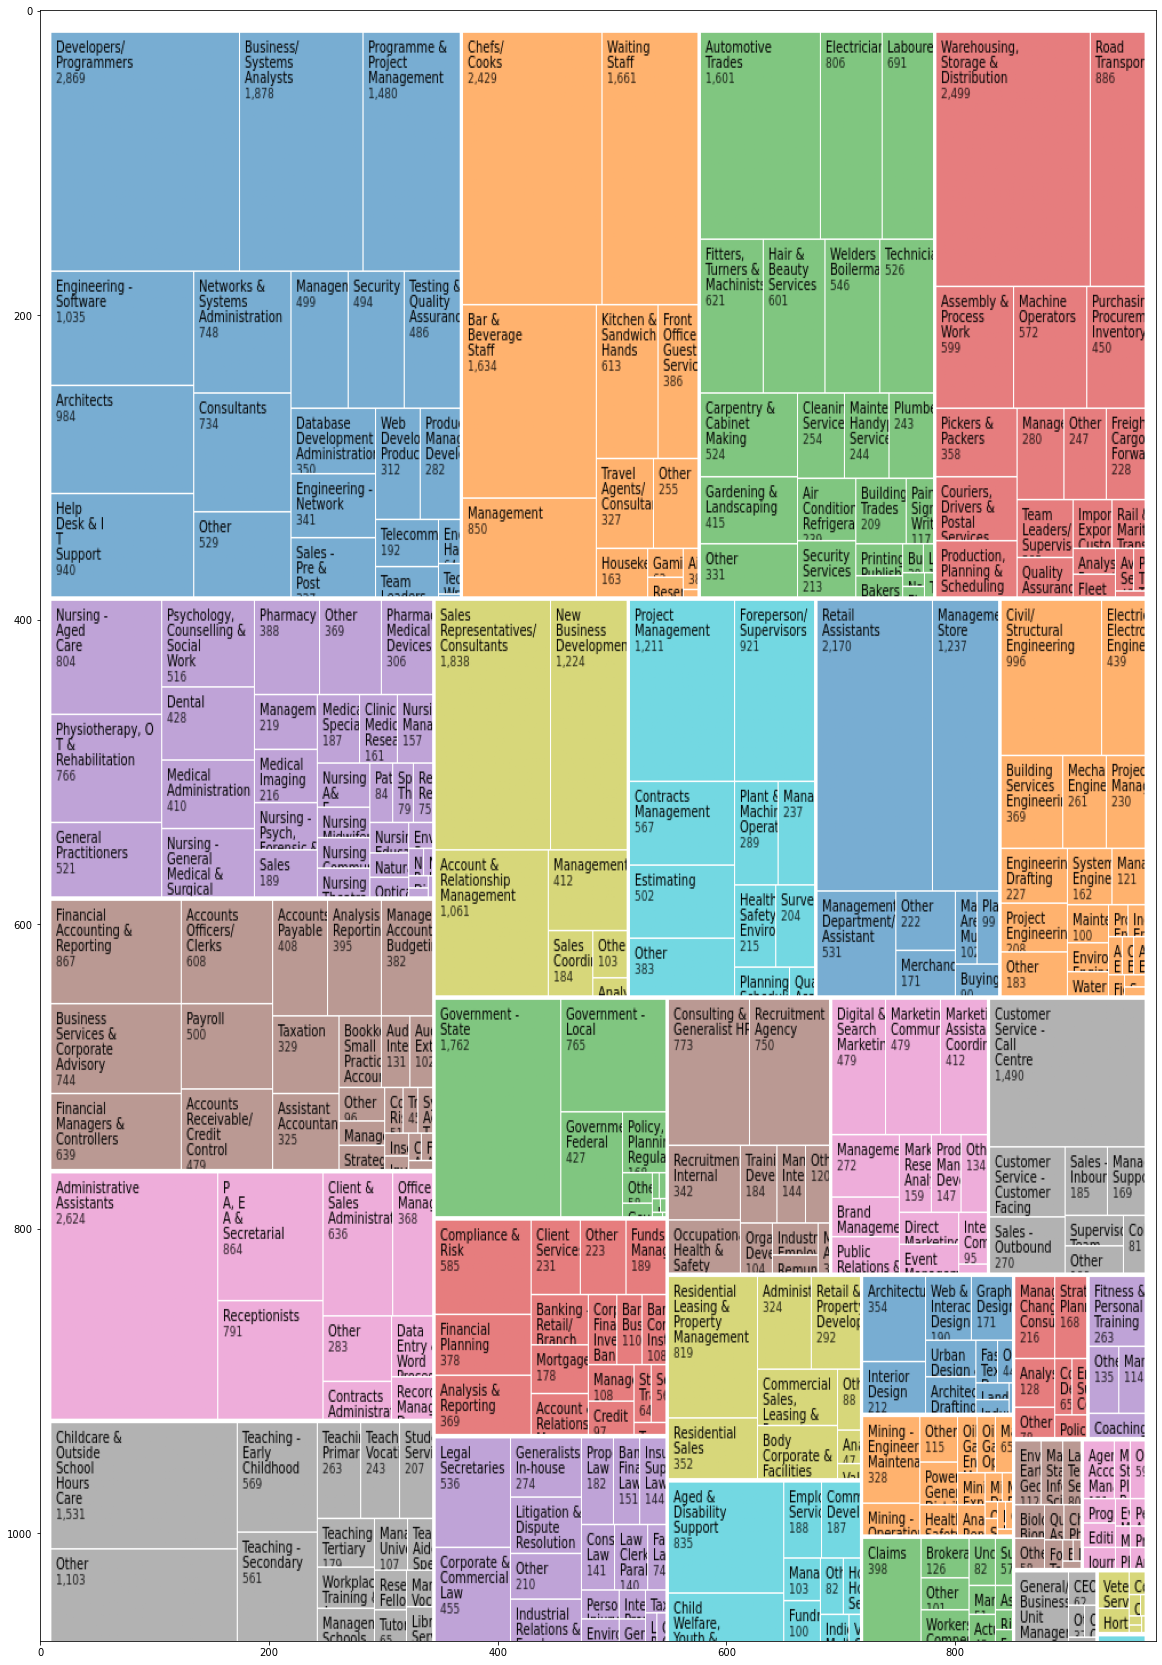

In [29]:
img = mpimg.imread('./d3/treemap_image.png')
plt.figure(figsize = (20,30))
imgplot = plt.imshow(img, aspect='auto')
plt.show()

The job posting consists of four different job types, full time, contact/temporary, casual/vacation and part time, 30 unique sectors and 337 sub-sector (technically 336, since other is used for postings that did not specify sub-sector in the job posting). The tree map visualize the sectors and sub-sectors from the database.

#### 2) Study the market by locations.

In [30]:
df['Location'].value_counts()

Sydney       49174
Melbourne    37156
Brisbane     15658
Perth         9121
Name: Location, dtype: int64

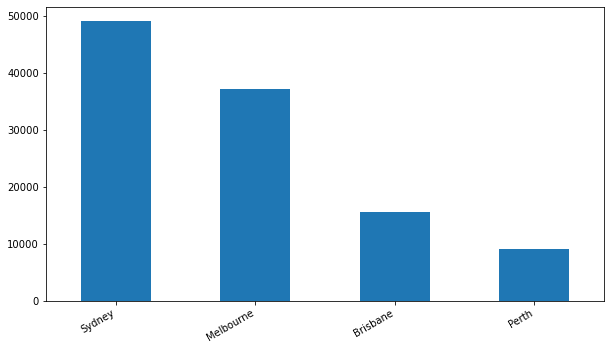

In [31]:
f, ax = plt.subplots(figsize=(10, 6))
# top 10 job posting location
df['Location'].value_counts().plot(kind='bar')
f.autofmt_xdate()
plt.show()

The above table shows Jobs sorted based on location, making Sydney the city with the highest job posting, followed by Melbourne, then Brisbane and lastly Perth.

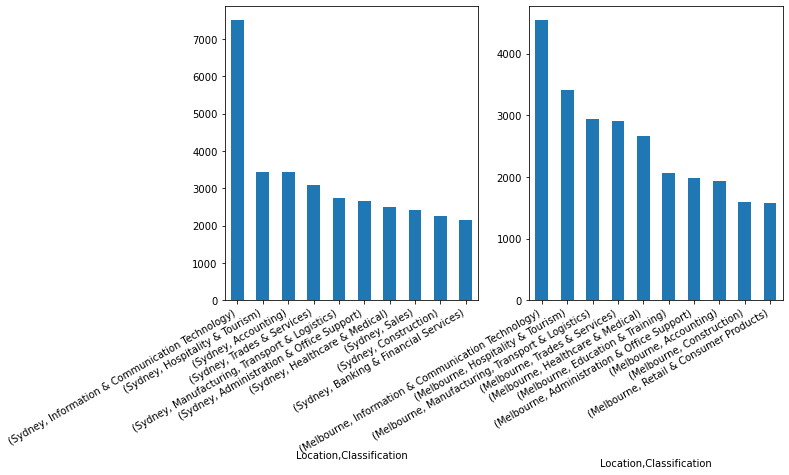

In [110]:
# top 10 location sorted by job sector
location1 = df[df['Location'] == 'Sydney']
location2 = df[df['Location'] == 'Melbourne']
location3 = df[df['Location'] == 'Brisbane']
location4 = df[df['Location'] == 'Perth']
locs = [location1, location2, location3, location4]

f, ax = plt.subplots(1, 2, figsize=(10, 6))

location1.groupby('Location')['Classification'].value_counts().head(10).plot(kind='bar', ax=ax[0])
location2.groupby('Location')['Classification'].value_counts().head(10).plot(kind='bar', ax=ax[1])
f.autofmt_xdate()
plt.show()

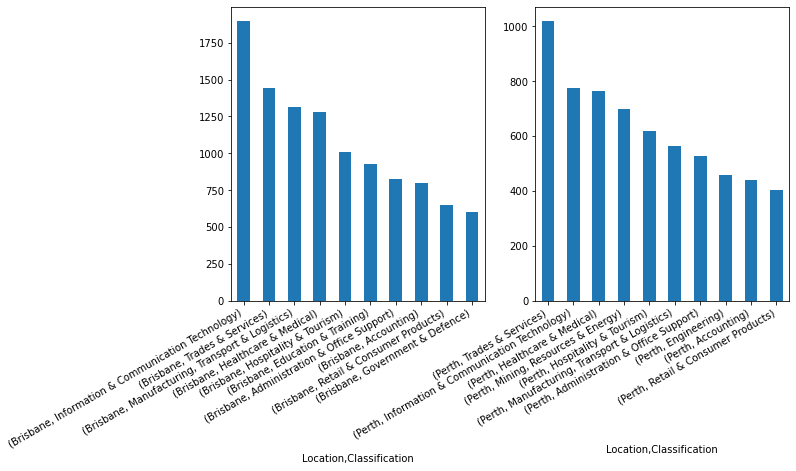

In [35]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
location3.groupby('Location')['Classification'].value_counts().head(10).plot(kind='bar', ax=ax[0])
location4.groupby('Location')['Classification'].value_counts().head(10).plot(kind='bar', ax=ax[1])
f.autofmt_xdate()
plt.show()

Hottest job in Sydney, Melbourne, Brisbane is information & communication Technology, with the expection of Perth being Trades & services. Even though all three cities most popular job posting is information & Communication Technology, is clear that Sydney has the most out of the three with over 7000 posting, which is higher than both Melbourne and Brisbane combined.

In [36]:
print("Sydney", location1['AverageSalary'].describe())
print()
print("Melbourne", location2['AverageSalary'].describe())
print()
print("Brisbane", location3['AverageSalary'].describe())
print()
print("Perth", location4['AverageSalary'].describe())

Sydney count    49174.000000
mean       102.204630
std        123.305671
min         15.000000
25%         45.000000
50%         65.000000
75%        110.000000
max        599.500000
Name: AverageSalary, dtype: float64

Melbourne count    37156.000000
mean        87.680859
std        106.979455
min         15.000000
25%         35.000000
50%         65.000000
75%        110.000000
max        599.500000
Name: AverageSalary, dtype: float64

Brisbane count    15658.000000
mean        89.867512
std        113.820646
min         15.000000
25%         35.000000
50%         65.000000
75%        110.000000
max        599.500000
Name: AverageSalary, dtype: float64

Perth count    9121.000000
mean       87.170869
std       101.714497
min        15.000000
25%        35.000000
50%        65.000000
75%       110.000000
max       599.500000
Name: AverageSalary, dtype: float64


The above table shows the average salary range of each city. Sydney has a minimum of 15 and maximum is 599.5, which is the same for Melbourne Brisbane, meaning all four cities have job posting with high salary.

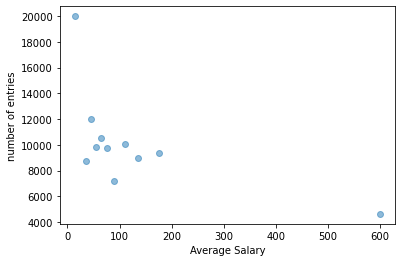

In [37]:
seg = df["AverageSalary"].value_counts()
plt.scatter(seg.index, seg, alpha=0.5)
plt.xlabel("Average Salary")
plt.ylabel("number of entries")
plt.show()

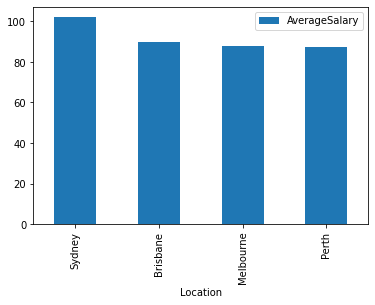

In [38]:
# show average salary by sorted by location
df.groupby('Location').agg({'AverageSalary':'mean'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

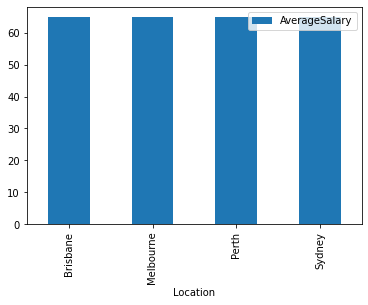

In [39]:
# average salary sorted by location 
df.groupby('Location').agg({'AverageSalary':'median'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

The above two graphs are a comparison between mean and median on average salary. Median does reduce the outlier (shown in the scatterplot) in dateset , however, since this is a job posting there is bound to jobs with high salary, therefore, mean is be the better choice to reflect that.

#### 3) Study the market by sectors.

In [40]:
df['Classification'].value_counts()

Information & Communication Technology    14713
Hospitality & Tourism                      8471
Trades & Services                          8450
Manufacturing, Transport & Logistics       7542
Healthcare & Medical                       7223
Accounting                                 6595
Administration & Office Support            6000
Education & Training                       5385
Sales                                      4862
Construction                               4671
Retail & Consumer Products                 4622
Engineering                                3648
Government & Defence                       3245
Banking & Financial Services               3181
Legal                                      3036
Human Resources & Recruitment              2852
Marketing & Communications                 2767
Call Centre & Customer Service             2749
Real Estate & Property                     2509
Community Services & Development           1991
Design & Architecture                   

In [41]:
df.groupby('Classification')['SubClassification'].value_counts().sort_values(ascending=False).head(10)

Classification                          SubClassification                  
Information & Communication Technology  Developers/Programmers                 2869
Administration & Office Support         Administrative Assistants              2624
Manufacturing, Transport & Logistics    Warehousing, Storage & Distribution    2499
Hospitality & Tourism                   Chefs/Cooks                            2429
Retail & Consumer Products              Retail Assistants                      2170
Information & Communication Technology  Business/Systems Analysts              1878
Sales                                   Sales Representatives/Consultants      1838
Government & Defence                    Government - State                     1762
Hospitality & Tourism                   Waiting Staff                          1661
                                        Bar & Beverage Staff                   1634
Name: SubClassification, dtype: int64

Information & Communication Techology holds the highest market share as the biggest sector, followed by Hospitality & Tourism, Trades & Services, Manufacturing, Transport & Logistics and Healthcare & Medical being the top five sectors.

Each of sector also have jobs that are popular in their own sector. First is Information & Communication Technology’s subsector leading with developers/programmers, followed by business/system analytics. Second is Hospitality & Tourism’s subsector leading with chefs/cooks, followed by waiting staff. Third is Trade & Services’s sub-sector’s leading with automotive trades, followed by electricians. fourth is Manufacturing, Transport & Logistics’s sub-sector leading with Warehousing Storage & DIstribution, followed by Road Transport. Lastly is Healthcare & Medical’s sub-sector leading with Nursing - Aged Care, followed by Physiotherapy, OT & Rehabilitation.

<em>note: A treemap is created in d3.js to visualise the marketshare. Hovering over text shows “job.” followed by sector, sub-sector and value, which are the hierarchy structure of the treemap.</em>

In [115]:
# salary range sector
item1 = df[df['Classification'] == 'Information & Communication Technology']
item2 = df[df['Classification'] == 'Hospitality & Tourism']
item3 = df[df['Classification'] == 'Trades & Services']
item4 = df[df['Classification'] == 'Manufacturing, Transport & Logistics']
item5 = df[df['Classification'] == 'Healthcare & Medical']
print("Information & Communication Technology\n", item1['AverageSalary'].describe())
print()
print("Hospitality & Tourism\n", item2['AverageSalary'].describe())
print()
print("Trades & Services\n", item3['AverageSalary'].describe())
print()
print("Manufacturing, Transport & Logistics\n", item4['AverageSalary'].describe())
print()
print("Healthcare & Medican\n", item5['AverageSalary'].describe())

Information & Communication Technology
 count    14713.000000
mean       176.958404
std        176.631466
min         15.000000
25%         75.000000
50%        135.000000
75%        175.000000
max        599.500000
Name: AverageSalary, dtype: float64

Hospitality & Tourism
 count    8471.000000
mean       39.641011
std        19.139668
min        15.000000
25%        35.000000
50%        35.000000
75%        45.000000
max       599.500000
Name: AverageSalary, dtype: float64

Trades & Services
 count    8450.000000
mean       53.031065
std        30.427951
min        15.000000
25%        35.000000
50%        55.000000
75%        75.000000
max       599.500000
Name: AverageSalary, dtype: float64

Manufacturing, Transport & Logistics
 count    7542.000000
mean       59.041899
std        59.232748
min        15.000000
25%        35.000000
50%        55.000000
75%        65.000000
max       599.500000
Name: AverageSalary, dtype: float64

Healthcare & Medican
 count    7223.000000
mean     

For the sectors the average salary range is the same across all five sectors with minimum of 15 and maximum of 599.5, meaning there is job in every sector with high pay position.

In [116]:
# salary range sub-sector
job1 = df[df['SubClassification'] == 'Developers/Programmers']
job2 = df[df['SubClassification'] == 'Chefs/Cooks']
job3 = df[df['SubClassification'] == 'Automotive Trades']
job4 = df[df['SubClassification'] == 'Warehousing, Storage & Distribution']
job5 = df[df['SubClassification'] == 'Nursing - Aged Care']
print("Developers/Programmers\n", job1['AverageSalary'].describe())
print()
print("Chefs/Cooks\n", job2['AverageSalary'].describe())
print()
print("Automotive Trades\n", job3['AverageSalary'].describe())
print()
print("Warehousing, Storage & Distribution\n", job4['AverageSalary'].describe())
print()
print("Nursing - Aged Care\n", job5['AverageSalary'].describe())

Developers/Programmers
 count    2869.000000
mean      157.159986
std       153.146324
min        15.000000
25%        90.000000
50%       135.000000
75%       175.000000
max       599.500000
Name: AverageSalary, dtype: float64

Chefs/Cooks
 count    2429.000000
mean       40.115274
std        16.962719
min        15.000000
25%        35.000000
50%        35.000000
75%        45.000000
max       135.000000
Name: AverageSalary, dtype: float64

Automotive Trades
 count    1601.000000
mean       51.196127
std        25.778315
min        15.000000
25%        35.000000
50%        45.000000
75%        65.000000
max       175.000000
Name: AverageSalary, dtype: float64

Warehousing, Storage & Distribution
 count    2499.000000
mean       47.717087
std        40.670809
min        15.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       599.500000
Name: AverageSalary, dtype: float64

Nursing - Aged Care
 count    804.000000
mean      68.005597
std       61.564733
min   

Unlike in the sector, if the most popular jobs within each sector are compared, there is a clear difference between them. Warehousing, storage & distribution nursing - aged care and developers/programmers all with a average salary range of minimum of 15, and maximum of 599.5, with chef/cook having a minimum of 15, and maximum 135, and automotive trades with a minimum of 15, maximum of 175. Therefore, the populars jobs in Trades & Services and Manufacturing, Transport & Logistics are not as well paid compared to other popular sectors.

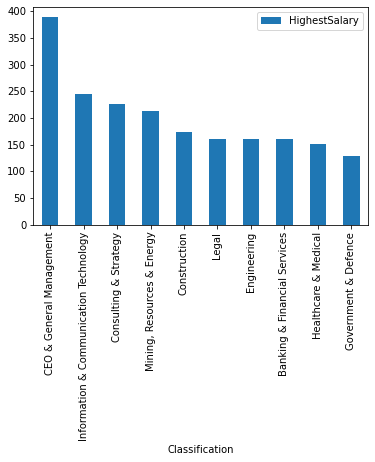

In [44]:
df.groupby('Classification').agg({'HighestSalary':'mean'}).sort_values(by='HighestSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

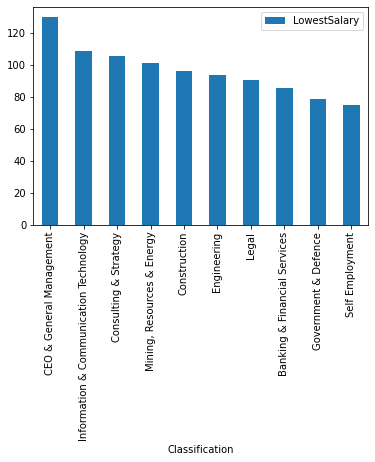

In [45]:
df.groupby('Classification').agg({'LowestSalary':'mean'}).sort_values(by='LowestSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

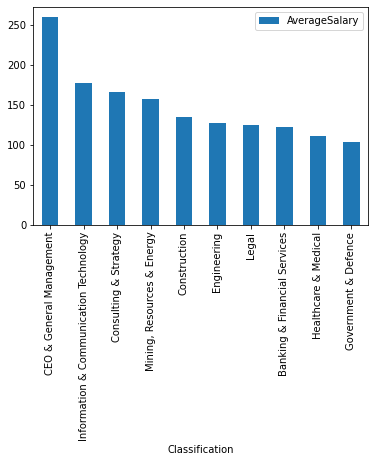

In [46]:
df.groupby('Classification').agg({'AverageSalary':'mean'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

The highest and lowest salary graphs are to see if it corresponds with the average salary, since high pay position should also top the list in the “LowestSalary/HighestSalary” columns, and “AverageSalary” does reflect that, therefore, average salary is a good reflection of the salary expected from the jobs.

The Average Salary shows that CEO & General Mangement is the highest paying jobs.

In a hypothetical scenario, a high school student asked for future job advice, the advice would be to avoid sectors with low market share, such as Advertising, Art & Media, Science & Technology and Sport & Recreation (some jobs with low market are excluded, since there is no university courses for those positions), and look at Information & Communication Technology and Healthcare & Medical, because the jobs in these sectors pays the highest (as shown above) and high in terms of market share.

#### Skills found from FullDescription

In [47]:
cnt = Counter()
for text in df['FullDescription'].values:
    for word in text.split():
        cnt[word] += 1

In [48]:
cnt.most_common(10)

[('experience', 243461),
 ('team', 191270),
 ('role', 190796),
 ('work', 189446),
 ('skills', 149962),
 ('business', 125444),
 ('management', 112926),
 ('working', 110823),
 ('please', 99525),
 ('apply', 98509)]

In [49]:
def preferred_skills(x):
    temp = df[df['Classification']==x]
    cnt = Counter()
    for text in temp['FullDescription'].values:
        for word in text.split():
            cnt[word] += 1
    return dict(cnt.most_common(20))

In [50]:
# top 10 jobs sectors
popular_jobs = df['Classification'].value_counts()[:10]
popular_jobs

Information & Communication Technology    14713
Hospitality & Tourism                      8471
Trades & Services                          8450
Manufacturing, Transport & Logistics       7542
Healthcare & Medical                       7223
Accounting                                 6595
Administration & Office Support            6000
Education & Training                       5385
Sales                                      4862
Construction                               4671
Name: Classification, dtype: int64

In [51]:
df['FullDescription']

121         secure long term role genuine career path su...
122       one australias best engineering workshops hiri...
125       anzuk anzuk early recruitment agency provide e...
126       australian icon connects people world post rol...
127       company organisation wellestablished vast mark...
                                ...                        
197216    successful family owned retailer 40 stores thr...
197217    work large bank wide program banking code prac...
197218    leading financial sector seeking test test ana...
197222    privately owned leading national construction ...
197225    growing amp financially secure builder senior ...
Name: FullDescription, Length: 111109, dtype: object

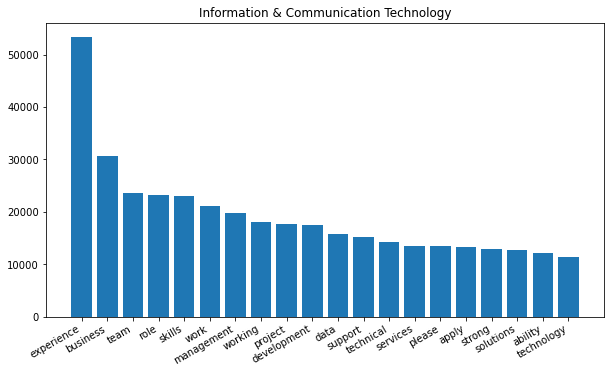

In [52]:
most_popular = preferred_skills(popular_jobs.index[0])
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(most_popular.keys(), most_popular.values())
plt.title('Information & Communication Technology')
f.autofmt_xdate()
plt.show()

#### Skills found from Requirement

In [53]:
# Lowercase all Requirements
df['Requirement'] = df['Requirement'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuation
df['Requirement'] = df['Requirement'].str.replace('[^\w\s]','')

# Remove stopwords
stop = stopwords.words('english')
df['Requirement'] = df['Requirement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


# Requirement analysis
temp = pd.DataFrame(df['Classification'])
temp['Reqirement'] = df['Requirement']
classification = temp['Classification'].unique()

# Create job_cls dict to save all Requirement for each Classification
job_cls = {}
for i in classification:
    job_cls[i] = ""

# Concat Requirement for each Classification    
arr_temp = temp.to_numpy()
for i in arr_temp:
    job_cls[i[0]] += i[1]


# Most frequent phrases for each Classification 
most_freq_phrases = {}

for key, item in job_cls.items():
    most_freq_phrases[key] = list(ngrams(item.split(' '), 2))


/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [113]:
print("|| Required skills for each sub-sector ||")
for key, item in most_freq_phrases.items():
    print(f"\n- {key}")
    skills = set()
    for i in item:
        if 'skill' == i[1] or 'skills' == i[1]:
            if i[0] not in skills:
                print(f'{i[0]} {i[1]}, ', end=' ')
                skills.add(i[0])
                if len(skills) > 4:
                    break
    print()

|| Required skills for each sub-sector ||

- Trades & Services
person skills,  proficient skills,  passion skills,  develop skills,  exceptional skills,  

- Education & Training
want skills,  coordination skills,  knowledge skills,  research skills,  hands skills,  

- Engineering
strong skills,  facing skills,  design skills,  apply skills,  engineering skills,  

- Information & Communication Technology
support skills,  service skills,  lead skills,  vmware skills,  networking skills,  

- Marketing & Communications
communication skills,  management skills,  influencing skills,  campaign skills,  bring skills,  

- CEO & General Management
specialist skills,  practical skills,  entrepreneurial skills,  management skills,  strategic skills,  

- Human Resources & Recruitment
recruiting skills,  essential skills,  design skills,  leadership skills,  knowledge skills,  

- Accounting
communication skills,  technical skills,  use skills,  administrative skills,  experiencedevelop skills

### Trend analysis

#### Location based

In [55]:
location_posting = df.groupby('Date')['Location'].value_counts()
location_posting = location_posting.to_frame('sum').reset_index().set_index('Date')

In [56]:
# four locations
syd_posting = location_posting[location_posting.Location == 'Sydney']
melb_posting = location_posting[location_posting.Location == 'Melbourne']
perth_posting = location_posting[location_posting.Location == 'Perth'] 
bris_posting = location_posting[location_posting.Location == 'Brisbane'] 

In [57]:
# change to month start
syd_posting_ms = syd_posting.resample("MS")['sum'].agg(['sum']).reset_index()
melb_posting_ms = melb_posting.resample("MS")['sum'].agg(['sum']).reset_index()
perth_posting_ms = perth_posting.resample("MS")['sum'].agg(['sum']).reset_index()
bris_posting_ms = bris_posting.resample("MS")['sum'].agg(['sum']).reset_index()

In [58]:
# weekly
syd_posting_w = syd_posting.resample("W")['sum'].agg(['sum']).reset_index()
melb_posting_w = melb_posting.resample("W")['sum'].agg(['sum']).reset_index()
perth_posting_w = perth_posting.resample("W")['sum'].agg(['sum']).reset_index()
bris_posting_w = bris_posting.resample("W")['sum'].agg(['sum']).reset_index()

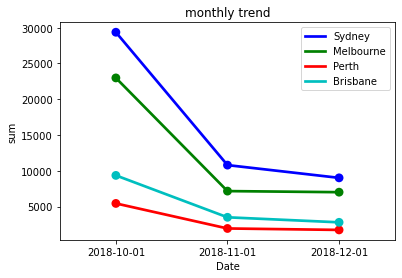

In [59]:
f, ax = plt.subplots(1, 1)
ax = sns.pointplot(x='Date', y='sum', data=syd_posting_ms, color='b')
ax1 = sns.pointplot(x='Date', y='sum', data=melb_posting_ms, color='g')
ax2 =sns.pointplot(x='Date', y='sum', data=perth_posting_ms, color='r')
ax3 = sns.pointplot(x='Date', y='sum', data=bris_posting_ms, color='c')
plt.title("monthly trend")
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
ax.legend(handles=ax.lines[::len(syd_posting_ms)+1], labels=["Sydney", "Melbourne", "Perth", "Brisbane"])
plt.show()

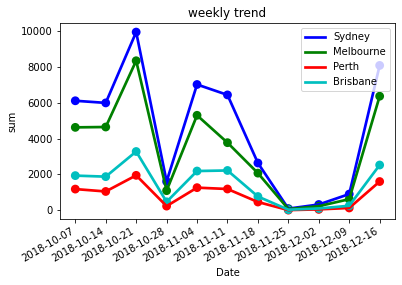

In [60]:
f, ax = plt.subplots(1, 1)
ax = sns.pointplot(x='Date', y='sum', data=syd_posting_w, color='b')
ax1 = sns.pointplot(x='Date', y='sum', data=melb_posting_w, color='g')
ax2 =sns.pointplot(x='Date', y='sum', data=perth_posting_w, color='r')
ax3 = sns.pointplot(x='Date', y='sum', data=bris_posting_w, color='c')
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.title("weekly trend")
ax.legend(handles=ax.lines[::len(syd_posting_w)+1], labels=["Sydney", "Melbourne", "Perth", "Brisbane"])
plt.gcf().autofmt_xdate()
plt.show()

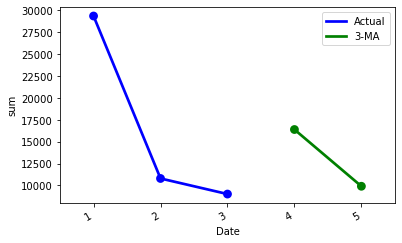

In [61]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Date','sum'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['sum'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]

    moving_average_df['Date'] = moving_average_df['Date'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(syd_posting_ms, 3, 5)
sns.pointplot(x='Date', y='sum', data=syd_posting_ms, color='b')
sns.pointplot(x='Date', y='sum', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(syd_posting_ms)+1], labels=["Actual", "3-MA"])
plt.gcf().autofmt_xdate()
plt.show()

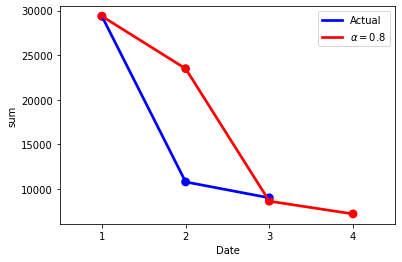

In [62]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Date','sum'])
    es_df.loc[0] = [1, df['sum'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['sum'][m] + (1-alpha) * es_df['Date'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Date'] = es_df['Date'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_08 = exponential_smoothing(syd_posting_ms, 0.8)
sns.pointplot(ax=ax, x='Date', y='sum', data=syd_posting_ms, color='b')
sns.pointplot(ax=ax, x='Date', y='sum', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(syd_posting_ms)+2], labels=["Actual", r"$\alpha=0.8$"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


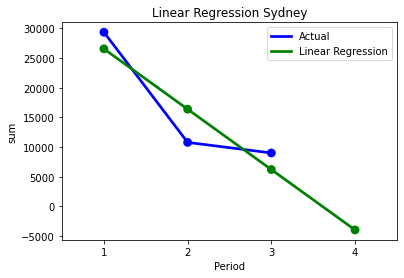

In [63]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['Period'] = linear_df.index + 1
    linear_df['Periodsum'] = linear_df['Period'] * linear_df['sum']
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['sum_2'] = linear_df['sum'] * linear_df['sum']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['Periodsum'] - len(df) * linear_mean['Period'] * linear_mean['sum']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['sum'] - b * linear_mean['Period']
    return a,b

a,b = linear_regression(syd_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=syd_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Sydney")
ax.legend(handles=ax.lines[::len(syd_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


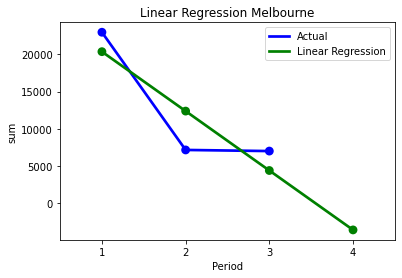

In [64]:
a,b = linear_regression(melb_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=melb_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Melbourne")
ax.legend(handles=ax.lines[::len(melb_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


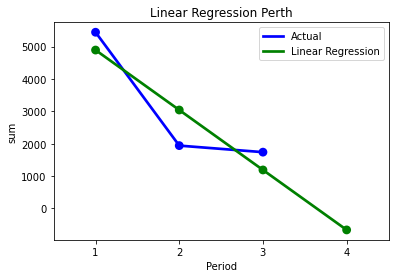

In [65]:
a,b = linear_regression(perth_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=perth_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Perth")
ax.legend(handles=ax.lines[::len(perth_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


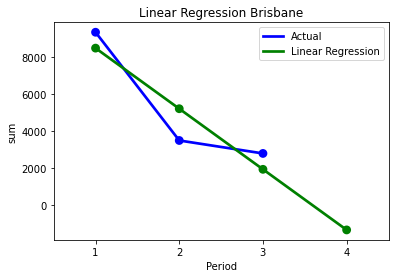

In [66]:
a,b = linear_regression(bris_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=bris_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Brisbane")
ax.legend(handles=ax.lines[::len(bris_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


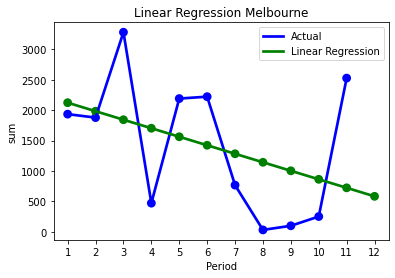

In [67]:
a,b = linear_regression(bris_posting_w)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 13):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=bris_posting_w, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Melbourne")
ax.legend(handles=ax.lines[::len(bris_posting_w)+2], labels=["Actual", "Linear Regression"])
plt.show()

The graphs above shows the trend for job posting based on cities. All the cities demonstrated a similar trend on the weekly trend graph. The graph showed that there is not much job postings at the start of the month, but rather middle of the month is where posting starts to ramp up and then decreases towards the end of the month.
The data is then resampled by start of the month, this visualises the number of posting of each month, and it is clear that there is downwards trend from October to December.

From moving average, exponential smoothing and linear regression it all predicted a downward trend in the end of December and start of January. Considering there is also Christmas in December, this downwards trend is expected.

#### sector based

In [68]:
sector_posting = df.groupby('Date')['Classification'].value_counts()
sector_posting = sector_posting.to_frame('sum').reset_index().set_index('Date')

In [69]:
# top five sectors
inf_posting = sector_posting[sector_posting.Classification == 'Information & Communication Technology']
hos_posting = sector_posting[sector_posting.Classification == 'Hospitality & Tourism']
trade_posting = sector_posting[sector_posting.Classification == 'Trades & Services']
transport_posting = sector_posting[sector_posting.Classification == 'Manufacturing, Transport & Logistics']
health_posting = sector_posting[sector_posting.Classification == 'Healthcare & Medical']

In [70]:
# change to month start
inf_posting_ms = inf_posting.resample("MS")['sum'].agg(['sum']).reset_index()
hos_posting_ms = hos_posting.resample("MS")['sum'].agg(['sum']).reset_index()
trade_posting_ms = trade_posting.resample("MS")['sum'].agg(['sum']).reset_index()
transport_posting_ms = transport_posting.resample("MS")['sum'].agg(['sum']).reset_index()
health_posting_ms = health_posting.resample("MS")['sum'].agg(['sum']).reset_index()

In [71]:
# weekly
inf_posting_w = inf_posting.resample("W")['sum'].agg(['sum']).reset_index()
hos_posting_w = hos_posting.resample("W")['sum'].agg(['sum']).reset_index()
trade_posting_w = trade_posting.resample("W")['sum'].agg(['sum']).reset_index()
transport_posting_w = transport_posting.resample("MS")['sum'].agg(['sum']).reset_index()
health_posting_w = health_posting.resample("W")['sum'].agg(['sum']).reset_index()

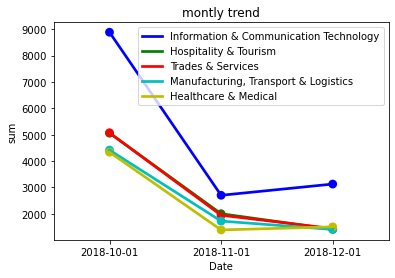

In [72]:
f, ax = plt.subplots(1, 1)
ax = sns.pointplot(x='Date', y='sum', data=inf_posting_ms, color='b')
ax1 = sns.pointplot(x='Date', y='sum', data=hos_posting_ms, color='g')
ax2 = sns.pointplot(x='Date', y='sum', data=trade_posting_ms, color='r')
ax3 = sns.pointplot(x='Date', y='sum', data=transport_posting_ms, color='c')
ax4 = sns.pointplot(x='Date', y='sum', data=health_posting_ms, color='y')
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.title("montly trend")
ax.legend(handles=ax.lines[::len(inf_posting_ms)+1], labels=["Information & Communication Technology", 
    "Hospitality & Tourism", "Trades & Services", "Manufacturing, Transport & Logistics", "Healthcare & Medical"])
plt.show()

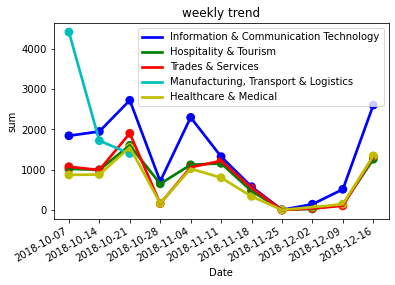

In [73]:
f, ax = plt.subplots(1, 1)
ax = sns.pointplot(x='Date', y='sum', data=inf_posting_w, color='b')
ax1 = sns.pointplot(x='Date', y='sum', data=hos_posting_w, color='g')
ax2 = sns.pointplot(x='Date', y='sum', data=trade_posting_w, color='r')
ax3 = sns.pointplot(x='Date', y='sum', data=transport_posting_w, color='c')
ax4 = sns.pointplot(x='Date', y='sum', data=health_posting_w, color='y')
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.title("weekly trend")
ax.legend(handles=ax.lines[::len(inf_posting_w)+1], labels=["Information & Communication Technology", 
    "Hospitality & Tourism", "Trades & Services", "Manufacturing, Transport & Logistics", "Healthcare & Medical"])
plt.gcf().autofmt_xdate()
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


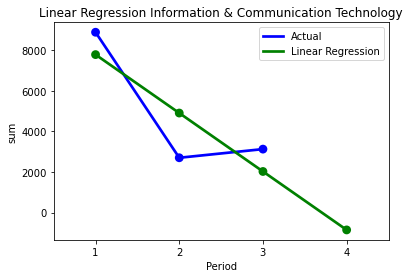

In [74]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['Period'] = linear_df.index + 1
    linear_df['Periodsum'] = linear_df['Period'] * linear_df['sum']
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['sum_2'] = linear_df['sum'] * linear_df['sum']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['Periodsum'] - len(df) * linear_mean['Period'] * linear_mean['sum']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['sum'] - b * linear_mean['Period']
    return a,b

a,b = linear_regression(inf_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=inf_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Information & Communication Technology")
ax.legend(handles=ax.lines[::len(inf_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


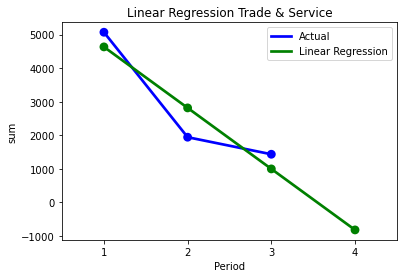

In [75]:
a,b = linear_regression(trade_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=trade_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Trade & Service")
ax.legend(handles=ax.lines[::len(trade_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


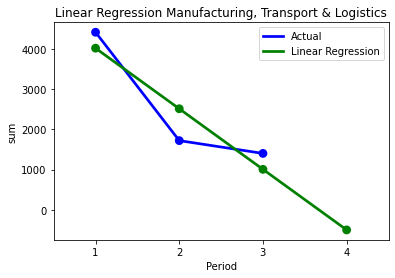

In [76]:
a,b = linear_regression(transport_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=transport_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Manufacturing, Transport & Logistics")
ax.legend(handles=ax.lines[::len(transport_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


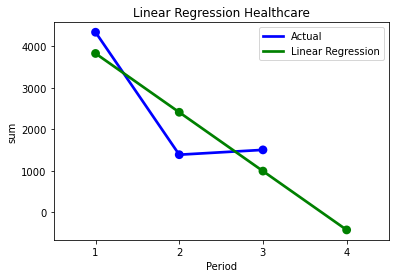

In [77]:
a,b = linear_regression(health_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=health_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Healthcare")
ax.legend(handles=ax.lines[::len(health_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


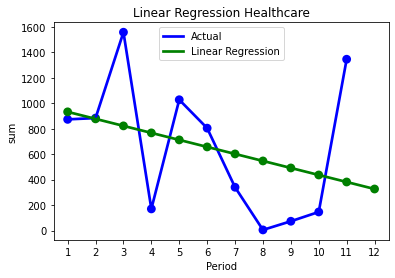

In [78]:
a,b = linear_regression(health_posting_w)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 13):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=health_posting_w, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Healthcare")
ax.legend(handles=ax.lines[::len(health_posting_w)+2], labels=["Actual", "Linear Regression"])
plt.show()

The weekly trend for job posting based on the sectors, which all demonstrated a similar trend. The graphs showed a low quantity of job postings at the start of the month, the trend increases towards the middle of the month and drops off towards the end of the month. There is one exception and that showed influx of job postings at during the first week of October and that sector is Manufacturing, Transport & Logistics.
The data is then resample by start of the month, the sector showed a similar trend in comparison to trend in cities.

From moving average, exponential smoothing and linear regression it all predicted a downward trend in the end of December and start of January, which corresponds to the trend cities result. Meaning no matter the city or job, the number of job postings will decrease in December.

## Part 3 - Evaluation

#### 1) What are the findings of your data analytics for the above sections?

- Job Markets

    Analysis from Task 2 shows a few notable points. First, 67% of the job postings are full-time positions followed by Contract/Temp(18%), Casual/Vacation(7%) and Part-time(7%). In Australia, the top 3 most popular job listings are Information & Communication Technology, Hospitality & Tourism, and Trades & Services. The top 3 most popular sub-sectors are Management, Developers/Programmers, and Administrative Assistants.
     

 
- Salary 

    It appears that the CEO & GM earns the highest salary, followed by Consulting & Strategy and Information & Communication Technology. Interestingly, General Practitioners has the highest average salary, and it shows that there is little gap between the lowest and highest salary in this sector. 
      

 
- Requires skills

    There were a few skills for each sub-sector drawn from requirements. 


<table class="dcf-table dcf-table-responsive dcf-table-bordered dcf-table-striped dcf-w-100%">
	<tbody>
		<tr>
			<td>Trades &amp; Services</td>
			<td>Education &amp; Training</td>
			<td>Engineering</td>
			<td>Information &amp; Communication Technology</td>
			<td>Marketing &amp; Communications</td>
		</tr>
		<tr>
			<td>   - person skill <br>
   - proficient skill <br>
   - passion skill <br>
   - develop skill <br>
   - exceptional skill <br>
   - required skill <br>
   - therapist skill <br>
   - laser skill <br>
   - engineering skill <br>
   - specialised skill <br>
   - rounded skill <br></td>
			<td>   - want skill <br>
   - coordination skill <br>
   - knowledge skill <br>
   - research skill <br>
   - hands skill <br>
   - environmentapply skill <br>
   - communication skill <br>
   - qualities skill <br>
   - experience skill <br>
   - students skill <br>
   - within skill <br></td>
			<td>   - strong skill <br>
   - facing skill <br>
   - design skill <br>
   - apply skill <br>
   - engineering skill <br>
   - communication skill <br>
   - build skill <br>
   - engagement skill <br>
   - revit skill <br>
   - management skill <br>
   - see skill <br></td>
			<td>   - support skill <br>
   - service skill <br>
   - lead skill <br>
   - vmware skill <br>
   - networking skill <br>
   - expand skill <br>
   - leadership skill <br>
   - computer skill <br>
   - av skill <br>
   - nextlevel skill <br>
   - queryutilise skill <br></td>
			<td>   - communication skill <br>
   - management skill <br>
   - influencing skill <br>
   - campaign skill <br>
   - bring skill <br>
   - knowledge skill <br>
   - experience skill <br>
   - expand skill <br>
   - crafting skill <br>
   - marketing skill <br>
   - new skill <br></td>
		</tr>
		<tr>
			<td>CEO &amp; General Management</td>
			<td>Human Resources &amp; Recruitment</td>
			<td>Accounting</td>
			<td>Legal</td>
			<td>Real Estate &amp; Property</td>
		</tr>
		<tr>
			<td>   - specialist skill <br>
   - practical skill <br>
   - entrepreneurial skill <br>
   - management skill <br>
   - strategic skill <br>
   - influencing skill <br></td>
			<td>   - recruiting skill <br>
   - essential skill <br>
   - design skill <br>
   - leadership skill <br>
   - knowledge skill <br>
   - management skill <br>
   - range skill <br>
   - influencing skill <br>
   - communication skill <br>
   - expansion skill <br>
   - develop skill <br></td>
			<td>   - communication skill <br>
   - technical skill <br>
   - use skill <br>
   - administrative skill <br>
   - experiencedevelop skill <br>
   - utilise skill <br>
   - improve skill <br>
   - analytical skill <br>
   - develop skill <br>
   - accounting skill <br>
   - bookkeeping skill <br></td>
			<td>   - excellent skill <br>
   - new skill <br>
   - secretarial skill <br>
   - challenge skill <br>
   - develop skill <br>
   - support skill <br>
   - legal skill <br>
   - increase skill <br>
   - expand skill <br>
   - organisational skill <br>
   - secretary skill <br></td>
			<td>   - administration skill <br>
   - networking skill <br>
   - negotiation skill <br>
   - management skill <br>
   - teamhone skill <br>
   - service skill <br>
   - readingexpand skill <br>
   - expert skill <br>
   - apply skill <br>
   - improve skill <br>
   - communication skill <br></td>
		</tr>
		<tr>
			<td>Manufacturing, Transport &amp; Logistics</td>
			<td>Healthcare &amp; Medical</td>
			<td>Banking &amp; Financial Services</td>
			<td>Construction</td>
			<td>Sport &amp; Recreation</td>
		</tr>
		<tr>
			<td>   - people skill <br>
   - service skill <br>
   - organisation skill <br>
   - opportunitiesput skill <br>
   - broaden skill <br>
   - computer skill <br>
   - communication skill <br>
   - experience skill <br>
   - management skill <br>
   - leadership skill <br>
   - manufacturing skill <br></td>
			<td>   - clinical skill <br>
   - provided skill <br>
   - management skill <br>
   - interpersonal skill <br>
   - service skill <br>
   - administration skill <br>
   - surgical skill <br>
   - managment skill <br>
   - product skill <br>
   - contract skill <br>
   - interventional skill <br></td>
			<td>   - management skill <br>
   - administration skill <br>
   - relations skill <br>
   - assessment skill <br>
   - solving skill <br>
   - xplan skill <br>
   - lending skill <br>
   - credit skill <br>
   - realignmentapply skill <br>
   - transformation skill <br>
   - leadership skill <br></td>
			<td>   - estimating skill <br>
   - seeking skill <br>
   - focus skill <br>
   - range skill <br>
   - administration skill <br>
   - building skill <br>
   - mandarin skill <br>
   - admin skill <br>
   - technical skill <br>
   - leadership skill <br>
   - management skill <br></td>
			<td>   - sales skill <br>
   - life skill <br>
   - service skill <br>
   - bayseeking skill <br>
   - lifelong skill <br>
   - developing skill <br>
   - put skill <br>
   - efforttransfer skill <br>
   - refine skill <br>
   - leadership skill <br>
   - develop skill <br></td>
		</tr>
		<tr>
			<td>Government &amp; Defence</td>
			<td>Hospitality &amp; Tourism</td>
			<td>Sales</td>
			<td>Retail &amp; Consumer Products</td>
			<td>Call Centre &amp; Customer Service</td>
		</tr>
		<tr>
			<td>   - service skill <br>
   - organisation skill <br>
   - design skill <br>
   - biology skill <br>
   - management skill <br>
   - optimise skill <br>
   - resourcesuse skill <br>
   - australiause skill <br>
   - technical skill <br>
   - verbal skill <br>
   - thinking skill <br></td>
			<td>   - people skill <br>
   - bar skill <br>
   - wait skill <br>
   - service skill <br>
   - decorative skill <br>
   - cooking skill <br>
   - leadership skill <br>
   - take skill <br>
   - culinary skill <br>
   - industry skill <br>
   - develop skill <br></td>
			<td>   - sales skill <br>
   - attribute skill <br>
   - service skill <br>
   - communication skill <br>
   - using skill <br>
   - admin skill <br>
   - effort skill <br>
   - management skill <br>
   - people skill <br>
   - interpersonal skill <br>
   - business skill <br></td>
			<td>   - service skill <br>
   - retail skill <br>
   - people skill <br>
   - use skill <br>
   - services skill <br>
   - leadership skill <br>
   - sales skill <br>
   - utilise skill <br>
   - merchandising skill <br>
   - engagement skill <br>
   - management skill <br></td>
			<td>   - use skill <br>
   - service skill <br>
   - interpersonal skill <br>
   - sales skill <br>
   - communication skill <br>
   - readtelesales skill <br>
   - new skill <br>
   - apply skill <br>
   - keyboard skill <br>
   - serviceaccountsadmin skill <br>
   - opportunitiesuse skill <br></td>
		</tr>
		<tr>
			<td>Administration &amp; Office Support</td>
			<td>Design &amp; Architecture</td>
			<td>Mining, Resources &amp; Energy</td>
			<td>Science &amp; Technology</td>
			<td>Advertising, Arts &amp; Media</td>
		</tr>
		<tr>
			<td>   - gain skill <br>
   - communication skill <br>
   - admin skill <br>
   - use skill <br>
   - administration skill <br>
   - service skill <br>
   - develop skill <br>
   - organisational skill <br>
   - exceptional skill <br>
   - put skill <br>
   - people skill <br></td>
			<td>   - autocad skill <br>
   - revit skill <br>
   - documentation skill <br>
   - detailing skill <br>
   - art skill <br>
   - passion skill <br>
   - creative skill <br>
   - advanced skill <br>
   - develop skill <br>
   - exceptional skill <br>
   - architecture skill <br></td>
			<td>   - developing skill <br>
   - utilise skill <br>
   - experience skill <br>
   - new skill <br>
   - analytical skill <br>
   - delivery skill <br>
   - communication skill <br>
   - mechanical skill <br>
   - project skill <br>
   - coding skill <br></td>
			<td>   - experience skill <br>
   - biology skill <br>
   - spectroscopy skill <br>
   - solving skill <br>
   - skill <br>surrounded skill <br>
   - engagement skill <br>
   - ds skill <br>
   - utilise skill <br>
   - develop skill <br></td>
			<td>   - service skill <br>
   - people skill <br>
   - start skill <br>
   - design skill <br>
   - content skill <br>
   - editorial skill <br>
   - creative skill <br>
   - editing skill <br>
   - developing skill <br>
   - admin skill <br>
   - grow skill <br></td>
		</tr>
		<tr>
			<td>Insurance &amp; Superannuation</td>
			<td>Farming, Animals &amp; Conservation</td>
			<td>Community Services &amp; Development</td>
			<td>Self Employment</td>
			<td>Consulting &amp; Strategy</td>
		</tr>
		<tr>
			<td>   - strategic skill <br>
   - leadership skill <br>
   - service skill <br>
   - new skill <br>
   - knowledge skill <br>
   - management skill <br>
   - technical skill <br>
   - winbeat skill <br>
   - bring skill <br>
   - combine skill <br>
   - developed skill <br></td>
			<td>   - gain skill <br>
   - clinical skill <br></td>
			<td>   - rosteringpeople skill <br>
   - use skill <br>
   - teamdemonstrated skill <br>
   - applyutilise skill <br>
   - interpersonal skill <br>
   - life skill <br>
   - traineesbuild skill <br>
   - specific skill <br>
   - recruitment skill <br>
   - demonstrated skill <br>
   - management skill <br></td>
			<td>   - bring skill <br></td>
			<td>   - advance skill <br>
   - consultancy skill <br>
   - organisational skill <br>
   - clientsuse skill <br>
   - australiause skill <br>
   - thinking skill <br>
   - engagement skill <br>
   - design skill <br>
   - skill <br>proven skill <br>
   - within skill <br>
   - knowledge skill <br></td>
		</tr>
	</tbody>
</table>

#### 2) What actions for balancing the markets do you suggest based on your findings?

- Suggestion to Griffith University

    Currently, a bachelor of computer science is only provided in Gold Coast. However, there is a large number of Information & Communication Technology jobs in Brisbane based on the analysis. It is assumed that there is a high demand for a bachelor of computer science in Brisbane. Therefore it seems only natural to make the degree available in Brisbane. 

#### 3) How could you refine your data analytics?

The analysis from the dataset provides insights for Job market trends, salary and required skills for different sub-sectors. However, this dataset is not suitable for sentiment analysis such as job satisfaction since most job advertisements are written in a neutral tone and not reflecting the opinions of the people who work in that job. To refine the data analytics, we can add a dataset that contains thoughts and ideas about specific jobs. For example, Reddit is a popular social media platform since users can form communities with people with similar hobbies, interests, or occupations. A survey from a particular community for different work field can be used for further analysis such as job satisfaction, working hours and required skills. 

Also, this dataset only contains the job listing listed in Sydney, Melbourne, Brisbane, and Perth, where less than 60% of the Australian population reside. If the dataset includes the rest of the city, there will be a more detailed analysis of Australia job analysis. 

#### 4) Are there any implications for employers and employees based on the findings you obtained? Justify your answer.



The salary analysis shows the minimum, maximum, and average wage of each category and sub-sectors. Employers and employees can reference the salary analysis for their hiring or job-seeking processes. Employers can offer competitive salary to employees, and employees can make their decision based on the data. 

Also, employees can consider the relocation based on the analysis of the number of jobs for each sector/sub-sector. For example, if a person living in Perth looking for a job in Information & Communication Technology, it t appears that there are more jobs in the Trades & Services sector in Perth. Therefore, the person can choose to relocate to Sydney or Melbourne, where more Information & Communication Technology jobs available. 


## Part 4 - Case Studies: Case 1

In [79]:
# modified for this case study
def preferred_skills_cs(x):
    temp = df[df['SubClassification']==x]
    cnt = Counter()
    for text in temp['FullDescription'].values:
        for word in text.split():
            cnt[word] += 1
    return dict(cnt.most_common(10))

In [80]:
popular_jobs_cs = item1['SubClassification'].value_counts()[:10]
popular_jobs_cs

Developers/Programmers               2869
Business/Systems Analysts            1878
Programme & Project Management       1480
Engineering - Software               1035
Architects                            984
Help Desk & IT Support                940
Networks & Systems Administration     748
Consultants                           734
Other                                 529
Management                            499
Name: SubClassification, dtype: int64

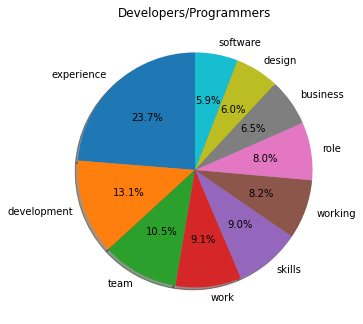

In [81]:
most_popular = preferred_skills_cs(popular_jobs_cs.index[0])
f, ax = plt.subplots(figsize=(10, 6))
plt.pie(most_popular.values(), labels=most_popular.keys(), autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.title('Developers/Programmers')
f.autofmt_xdate()
plt.show()

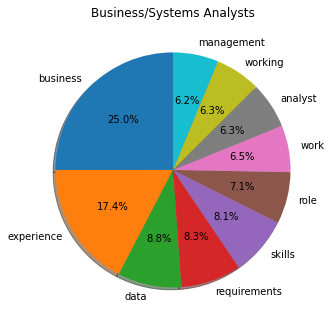

In [82]:
most_popular = preferred_skills_cs(popular_jobs_cs.index[1])
f, ax = plt.subplots(figsize=(10, 6))
plt.pie(most_popular.values(), labels=most_popular.keys(), autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.title('Business/Systems Analysts')
f.autofmt_xdate()
plt.show()

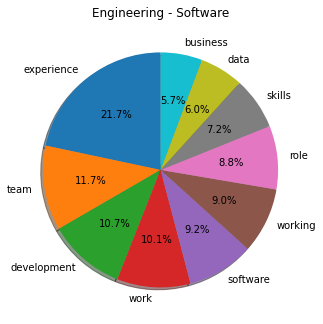

In [83]:
most_popular = preferred_skills_cs(popular_jobs_cs.index[3])
f, ax = plt.subplots(figsize=(10, 6))
plt.pie(most_popular.values(), labels=most_popular.keys(), autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.title('Engineering - Software')
f.autofmt_xdate()
plt.show()

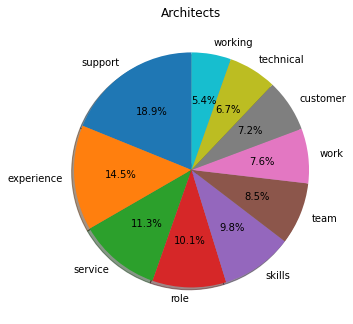

In [84]:
most_popular = preferred_skills_cs(popular_jobs_cs.index[5])
f, ax = plt.subplots(figsize=(10, 6))
plt.pie(most_popular.values(), labels=most_popular.keys(), autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.title('Architects')
f.autofmt_xdate()
plt.show()

In [85]:
subsector_posting = df.groupby('Date')['SubClassification'].value_counts()
subsector_posting = subsector_posting.to_frame('sum').reset_index().set_index('Date')

In [86]:
# top five sectors
dev_posting = subsector_posting[subsector_posting.SubClassification == 'Developers/Programmers']
bus_posting = subsector_posting[subsector_posting.SubClassification == 'Business/Systems Analysts']
eng_posting = subsector_posting[subsector_posting.SubClassification == 'Engineering - Software']
arch_posting = subsector_posting[subsector_posting.SubClassification == 'Architects']

In [87]:
# month start
dev_posting_ms = dev_posting.resample("MS")['sum'].agg(['sum']).reset_index()
bus_posting_ms = bus_posting.resample("MS")['sum'].agg(['sum']).reset_index()
eng_posting_ms = eng_posting.resample("MS")['sum'].agg(['sum']).reset_index()
arch_posting_ms = arch_posting.resample("MS")['sum'].agg(['sum']).reset_index()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


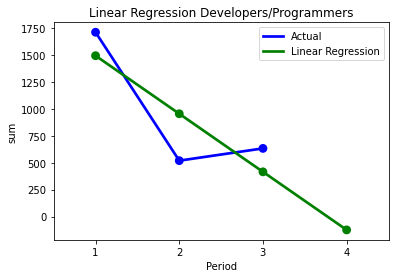

In [88]:
a,b = linear_regression(dev_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=dev_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Developers/Programmers")
ax.legend(handles=ax.lines[::len(dev_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


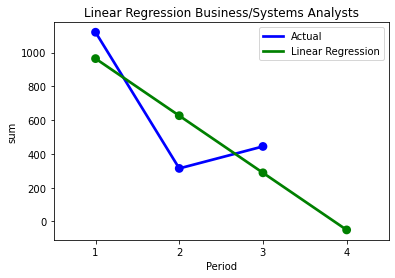

In [89]:
a,b = linear_regression(bus_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=bus_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Business/Systems Analysts")
ax.legend(handles=ax.lines[::len(bus_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


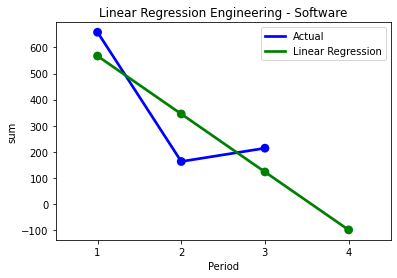

In [90]:
a,b = linear_regression(eng_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=eng_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Engineering - Software")
ax.legend(handles=ax.lines[::len(eng_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


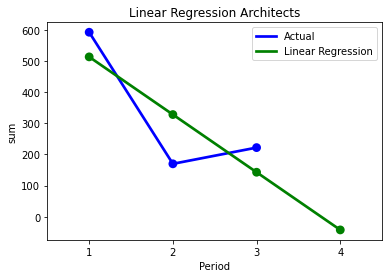

In [91]:
a,b = linear_regression(arch_posting_ms)
linear_df = pd.DataFrame(columns=['Period','sum'])
for m in range(1, 5):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Date', y='sum', data=arch_posting_ms, color='b')
sns.pointplot(ax=ax, x='Period', y='sum', data=linear_df, color='g')
plt.title("Linear Regression Architects")
ax.legend(handles=ax.lines[::len(arch_posting_ms)+2], labels=["Actual", "Linear Regression"])
plt.show()

The recommendations below are based on the textual analysis done before, and interpreted based on the keywords from “Requirement” and “FullDescription” columns.
There are four most popular jobs (that is applicable for graduate/undergraduate student) including: Developers/Programmers, Business/Systems Analysts, Engineering - Software, Architects.
The most important skill/asset for Matthew to improve on is his experience in the field, since all four jobs want the employee to have prior experience. Interpersonal will also be something for Matthew to work on, since all four jobs works in a team environment. If Matthew wants to become a Business/Systems Analysts, he needs to be able to identify business problems. If Matthew wishes to become a Developers/Programmer or Software Engineer, there will be more of an emphasis on designing/coding software. Maybe Matthew is looking at becoming an IT Architect, then he needs to have a high-level understanding of system network and high interpersonal skills that allows Matthew to respond to customer/organisation to provide service/support. If Matthew’s ultimate goal is a high pay job, then management is something he should be looking at, but requires extensive experience and leadership skills, not something really obtainable through university courses. Therefore, I would recommend Matthew to go for IT Architect if he wants to deal with customers/client demands and study subject in network analysis and design, business/system analysts if he wants to study business subjects or have business as his dual degree, developer/programmer if he only wants to focus on technically skills (coding, software development), which are present in subjects coding/software development courses.

The limited dataset also showed a trend of more job posting at the start of October, Matthew could also consider looking for experience during school vacation or after graduation and start posting a resume throughout October to increase his chance of landing a job.

## Part 4 - Case Studies: Case 2

- The problem.

    - Build a recommender system to provide top 10 jobs using a job market dataset suitable to a candidate's profile 

  

- The solution
    - This problem can be solved by using cosine similarity between CV and job listings. First, using sklearn's TF-IDF vectorizer,  create TF-IDF-weighted document-term matrix with requirements from the job listings. Then, calculate the cosine similarity between CV and job listings and returns the list of the score for each job listing. Now, sort the list from largest, then prints the job listing of the top 10 highest score. The example using my (Junghee) CV is below. 

In [92]:
# Initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_jobid = tfidf_vectorizer.fit_transform((df['Requirement']))

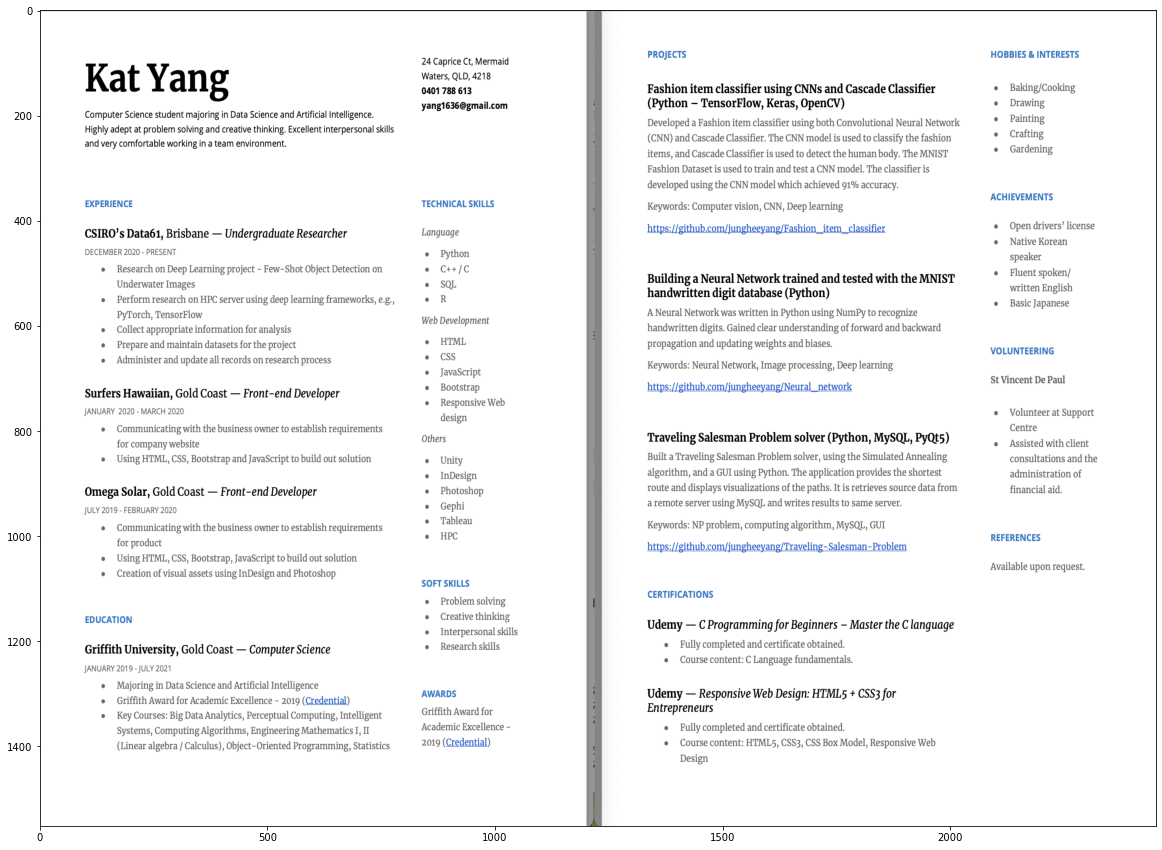

In [93]:
# Example CV
img = mpimg.imread('./example_cv.png')
plt.figure(figsize = (20,15))
imgplot = plt.imshow(img, aspect='auto')
plt.show()

In [94]:
# Read CV and extract text
import PyPDF2

pdfFileObj = open('./KatYang_Resume_05_2021.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)

cv = pageObj.extractText()

pdfFileObj.close()

In [95]:
# Using vector space model ( Cosine similarity )
from sklearn.metrics.pairwise import cosine_similarity

user_tfidf = tfidf_vectorizer.transform([cv])
output = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)
output2 = list(output)

In [96]:
#getting the job id's of the recommendations
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
recommendation = pd.DataFrame(columns = list(df.columns))

df['new_id'] = range(0, len(df))
for i in top:
    recommendation = recommendation.append(df[df['new_id']==i], ignore_index=True)

In [97]:
print("\nTop 10 recommended jobs")
recommendation[['Title', 'Location', 'Classification']]


Top 10 recommended jobs


,Title,Location,Classification
0,"Lead Front End Developer (HTML, CSS, JavaScrip...",Sydney,Information & Communication Technology
1,Senior Front End Developer,Melbourne,Information & Communication Technology
2,Senior Front End Developer,Melbourne,Information & Communication Technology
3,Senior Front End Developer,Melbourne,Information & Communication Technology
4,Technical Pre-Sales Consultant (ICT Business A...,Sydney,Information & Communication Technology
5,Front End Developer,Sydney,Information & Communication Technology
6,Web Developer,Melbourne,Information & Communication Technology
7,Web Developer | Product Support,Sydney,Information & Communication Technology
8,Senior Project Manager - Data and BI Projects,Sydney,Information & Communication Technology
9,Project Analyst,Sydney,Government & Defence
